<a href="https://colab.research.google.com/github/VenYay/CECS451_CSULB/blob/main/pi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nathan Venier - CECS 451, Estimating Pi

In [ ]:
import math
import numpy as np

In [ ]:
# Sets up the points as a key-value pairing of lists
n = {'10 ^ 3': 10**3, '10 ^ 4': 10**4, '10 ^ 5': 10**5, '10 ^ 6': 10**6}

rand_vals = {}

for key, value in n.items():
    rand_vals[key] = np.random.rand(2, value)

# Values are pairing in parallel lists in an [N x 2] array

In [ ]:
# A is the number of spots caught in the circle
A = {}
# approx_pi holds the approximated value of pi
approx_pi = {}
# err holds the approximated error
err = {}

# Euclidian distance
dist = 0

# Lists for graphing
is_inside = []
x = []
y = []

for key, value in rand_vals.items():
    # Counts number of points that appear in pi/4
    dist = np.sqrt(np.square(value[0]) + np.square(value[1]))
    A[key] = np.sum(dist < 1)

    approx_pi[key] = 4 * A[key] / n[key]
    err[key] = abs(approx_pi[key] - math.pi) * 100

    # Print the results
    print("{}   pi = {:.4f}   error = {:.4f}".format(key, approx_pi[key], err[key]))

    # If statement to focus on "10 ^ 4" data for graphing
    if key == '10 ^ 4':
        # Use is_inside to store T/F values of a value being < 1
        is_inside = dist < 1

        # Get the x and y values
        x = rand_vals[key][0]
        y = rand_vals[key][1]

10 ^ 3   pi = 3.1840   error = 4.2407
10 ^ 4   pi = 3.1748   error = 3.3207
10 ^ 5   pi = 3.1342   error = 0.7393
10 ^ 6   pi = 3.1413   error = 0.0337


In [ ]:
# Create lists for graphing
less_than_one_x = []
less_than_one_y = []
greater_than_one_x = []
greater_than_one_y = []

for i in range(len(is_inside)):
  if is_inside[i]:
    less_than_one_x.append(x[i])
    less_than_one_y.append(y[i])
  else:
    greater_than_one_x.append(x[i])
    greater_than_one_y.append(y[i])

In [ ]:
import matplotlib.pyplot as plt

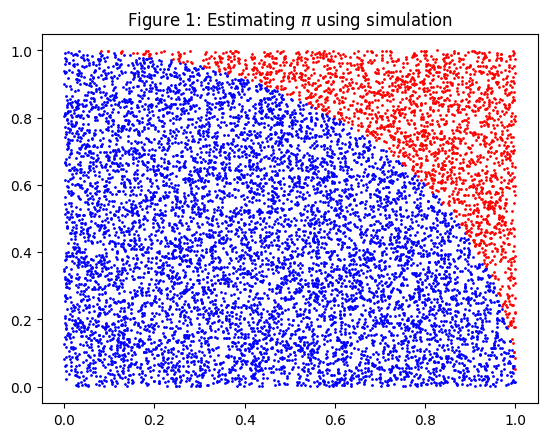

In [76]:
# Plot the two scatters on the same plot
figure = plt.figure()
ax = figure.add_subplot(111)

ax.scatter(less_than_one_x, less_than_one_y, s = 1, color = 'blue')
ax.scatter(greater_than_one_x, greater_than_one_y, s = 1, color = 'red')
plt.title("Figure 1: Estimating $\pi$ using simulation")

plt.show()